In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import os
import random
import cv2
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras import models

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

2022-09-15 13:45:46.581801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!nvidia-smi

Thu Aug 18 09:01:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.197.02   Driver Version: 418.197.02   CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:0A:00.0 Off |                    0 |
| N/A   33C    P0    43W / 300W |      0MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
# Loading the best saved models to make predictions
K.clear_session()
# model_best = load_model('models/EfficientNetV2S/EfficientNetV2S.hdf5', compile=False)
# model_best = load_model('models/EfficientNetV2L/EfficientNetV2L.hdf5', compile=False)
model_best = load_model('/Users/dim__gag/Desktop/EfficientNetV2L/EfficientNetV2L.hdf5', compile=False)

2022-09-15 13:46:34.281567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# Foods sorted
# data_dir = "/workspace/persistent/food-101/images" # This is for DSRI workspace path

data_dir = "/Users/dim__gag/Desktop/food-101/images" # This is for local path

foods_sorted = sorted(os.listdir(data_dir))


# foods_sorted = ['apple_pie','pizza','omelette']

In [14]:
len(foods_sorted)

101

In [15]:
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  return food_list

In [16]:
food_list = pick_n_random_classes(101)

In [17]:
food_list

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [18]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value) 
        plt.show()

In [4]:
images = [] 
# images.append('test_images/Apple.jpg')
# images.append('test_images/applepie.jpg')
# images.append('test_images/cupcakes.jpg')
# images.append('test_images/springrolls.jpg')
# images.append('test_images/samosa.jpg')


# images.append('test_images/burger.jpeg')
# images.append('test_images/hardburger.jpg')
# images.append('test_images/dim1.jpeg')
# images.append('test_images/dim2.jpeg')

# images.append('test_images/leo.jpg')


images.append('test_images/steak.jpg')

In [5]:
%pwd

'/Users/dim__gag/git/deepfood'

In [6]:
images

['test_images/steak.jpg']

1/1 [==============================] - 0s 489ms/step


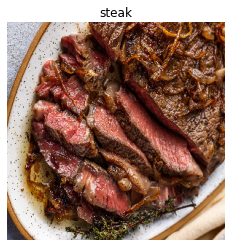

In [19]:
# show images
predict_class(model_best, images, show = True)

In [24]:
wrong = []
wrong.append('test_images/hardburger.jpg')

In [9]:
predict_class(model_best, wrong, show = True)

NameError: name 'wrong' is not defined

## Model Details and Evaluation

In [112]:
### Model Details

In [2]:
EfficientNetV2S = load_model('models/EfficientNetV2S/EfficientNetV2S.hdf5')

EfficientNetV2L = load_model('models/EfficientNetV2L/EfficientNetV2L.hdf5')

2022-08-19 15:42:35.545503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def print_model_details(model):
    def namestr(obj, namespace):
        return [name for name in namespace if namespace[name] is obj]
    print("==========================================================")            
    print("Model Name: ", namestr(model, globals()))
    print("Number of Layers: ", len(model.layers))
    print("Number of Parameters: ", format(model.count_params(), ',d'))
    print("==========================================================\n")

In [4]:
print_model_details(EfficientNetV2S)
print_model_details(EfficientNetV2L)

Model Name:  ['EfficientNetV2S']
Number of Layers:  516
Number of Parameters:  20,508,357

Model Name:  ['EfficientNetV2L']
Number of Layers:  1031
Number of Parameters:  117,923,845



In [70]:
'''from collections import defaultdict
import collections
import shutil
import os

# Train Data
classes_images=defaultdict(list)
with open('/Users/dim__gag/Desktop/food-101/meta/train.txt', 'r') as txt:
	paths= [read.strip() for read in txt.readlines()]
	for p in paths:
		food = p.split('/')
		classes_images[food[0]].append(food[1] + '.jpg')

for food in classes_images.keys():
	if not os.path.exists(os.path.join("/Users/dim__gag/Desktop/food-101/train",food)):
		os.makedirs(os.path.join("/Users/dim__gag/Desktop/food-101/train", food))
	for i in classes_images[food]:
		shutil.copyfile(os.path.join("/Users/dim__gag/Desktop/food-101/images", food, i), os.path.join("/Users/dim__gag/Desktop/food-101/train", food, i))
  '''

In [54]:
'''# Test/Validation Data
classes_images=defaultdict(list)
with open('/Users/dim__gag/Desktop/food-101/meta/test.txt', 'r') as txt:
	paths= [read.strip() for read in txt.readlines()]
	for p in paths:
		food = p.split('/')
		classes_images[food[0]].append(food[1] + '.jpg')

for food in classes_images.keys():
	if not os.path.exists(os.path.join("/Users/dim__gag/Desktop/food-101/test",food)):
		os.makedirs(os.path.join("/Users/dim__gag/Desktop/food-101/test", food))
	for i in classes_images[food]:
		shutil.copyfile(os.path.join("/Users/dim__gag/Desktop/food-101/images", food, i), os.path.join("/Users/dim__gag/Desktop/food-101/test", food, i))'''

In [61]:
%cd 

/Users/dim__gag


In [62]:
%cd /Users/dim__gag/Desktop/food-101

/Users/dim__gag/Desktop/food-101


In [5]:
# Data Augmentation for Evaluation
train_data_dir = "/Users/dim__gag/Desktop/food-101/train"
validation_data_dir = "/Users/dim__gag/Desktop/food-101/test"
img_width, img_height = 299, 299 # input image dimensions
batch_size = 32 # Change this to your desired batch size
# epochs = 100 # Change the Number of epochs here

def data_augmentation(train_data_dir, validation_data_dir, img_height, img_width, batch_size):
    # Data Augmentation
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1. / 255)
    
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')
    return train_generator, validation_generator



train_generator, validation_generator = data_augmentation(train_data_dir=train_data_dir, validation_data_dir=validation_data_dir, img_width=img_height, img_height=img_height, batch_size=batch_size)




Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [6]:
# Print training, test accuracy and loss of the model
def model_eval(model, train, val):
    # evaluate the model
    train_loss, train_acc = model.evaluate(train, verbose=0)
    val_loss, val_acc = model.evaluate(val, verbose=0)
    print('Train loss:', train_loss)
    print('Train accuracy:', train_acc)
    print('Validation loss:', val_loss)
    print('Validation accuracy:', val_acc)

In [ ]:
model_eval(EfficientNetV2S, train_generator, validation_generator)
model_eval(EfficientNetV2L, train_generator, validation_generator)